In [1]:
# Libraries
import os, sys, re, time, gc, csv, scipy, pickle, warnings

Notebook_start = time.time()

warnings.filterwarnings("ignore")

from LIWC_Methods import Custom_Methods 
CM = Custom_Methods()


import pandas as pd
import numpy as np

# natural language tool kit
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\peted\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Load dictiaries and files

In [3]:
######################################################################
## User input 2 urls
######################################################################

In [4]:
url_1 = 'https://www.nytimes.com/2021/11/29/us/politics/taliban-afghanistan-911-families-frozen-funds.html' # True News
url_2 = 'https://www.reuters.com/markets/us/us-house-leaders-float-short-term-fix-fund-govt-into-jan-punchbowl-2021-11-29/'
url_3 = 'https://www.stripes.com/theaters/us/2021-11-29/pentagon-drone-strike-investigation-syria-isis-civilian-deaths-3798293.html'
url_4 = 'https://www.tennessean.com/story/news/education/2021/11/29/nashville-school-board-refuses-update-policy-under-transgender-athlete-ban/6365041001/'
url_5 = 'https://www.bbc.com/news/world-us-canada-59469486'
url_6 = 'https://www.wsj.com/articles/ftc-asks-amazon-walmart-for-information-about-supply-chain-issues-11638221548?mod=hp_lead_pos6'
url_6 = 'https://empirenews.net/kraft-foods-to-re-brand-kool-aid-man-mascot-to-kool-aid-person-after-pressure-from-left-wing-groups/' # Fake News
url_7 = 'https://21stcenturywire.com/2021/11/29/digital-tyranny-rockefeller-gates-and-who-vaxx-certificate-passport-and-road-to-wwiii/'
url_8 = 'https://secondnexus.com/us-list-backsliding-democracies-first'
url_9 = 'https://www.palmerreport.com/analysis/eric-swalwell-rips-ted-cruz-a-new-one/42774/'
url_10 = 'https://spectator.org/israels-warns-biden-on-iran/'
url_11 = 'https://www.wonkette.com/qanon-weirdos-explain-michael-flynn-s-one-weird-trick-to-not-actually-denounce-them'
url_12 = 'https://thenewamerican.com/report-trans-children-are-being-severely-injured-by-puberty-blockers/'

In [5]:
######################################################################
##  User input url
######################################################################

In [6]:
# Allow user to input URL

urls = [url_1,url_2,url_3,url_4,url_5,url_6,url_7,url_8,url_9,url_10,url_11,url_12]

col_names = ['id','news_url','source','title','body','class','title_url_min','body_url_min','title_url','body_url','title_stem','body_stem','link_cnt','process_state']
df_old = pd.DataFrame(columns=col_names)

if len(urls) == 1:
    urls.append('https://empirenews.net/kraft-foods-to-re-brand-kool-aid-man-mascot-to-kool-aid-person-after-pressure-from-left-wing-groups/')

for num, url in enumerate(urls):
    df_old = df_old.append({'id':f'User_{num+1}'
                   ,'news_url':url
                   ,'source':''
                   ,'title':''
                   ,'body':''
                   ,'class':''
                   ,'title_url_min':''
                   ,'body_url_min':''
                   ,'title_url':''
                   ,'body_url':''
                   ,'title_stem':''
                   ,'body_stem':''
                   ,'link_cnt':''
                   ,'process_state':''
        
                    }, ignore_index=True)
    
df_old.source = CM.get_url_base(df_old,'news_url','source')
# df_old

In [7]:
df_old

,id,news_url,source,title,body,class,title_url_min,body_url_min,title_url,body_url,title_stem,body_stem,link_cnt,process_state
0,User_1,https://www.nytimes.com/2021/11/29/us/politics...,nytimes.com,,,,,,,,,,,
1,User_2,https://www.reuters.com/markets/us/us-house-le...,reuters.com,,,,,,,,,,,
2,User_3,https://www.stripes.com/theaters/us/2021-11-29...,stripes.com,,,,,,,,,,,
3,User_4,https://www.tennessean.com/story/news/educatio...,tennessean.com,,,,,,,,,,,
4,User_5,https://www.bbc.com/news/world-us-canada-59469486,bbc.com,,,,,,,,,,,
5,User_6,https://empirenews.net/kraft-foods-to-re-brand...,empirenews.net,,,,,,,,,,,
6,User_7,https://21stcenturywire.com/2021/11/29/digital...,21stcenturywire.com,,,,,,,,,,,
7,User_8,https://secondnexus.com/us-list-backsliding-de...,secondnexus.com,,,,,,,,,,,
8,User_9,https://www.palmerreport.com/analysis/eric-swa...,palmerreport.com,,,,,,,,,,,
9,User_10,https://spectator.org/israels-warns-biden-on-i...,spectator.org,,,,,,,,,,,


In [8]:
######################################################################
## Start Building Scorecard
######################################################################

In [9]:
# Scrap and clean document

start = time.time()
last_start = start
save_text = True

save_loc = f'dataset/Raw/LIWC/'
read_file = 'url_user'

# clean up old files
folders = ['url_user_body','url_user_title']
for folder in folders:
    loc = f'{save_loc}{folder}/'
    print('Delete loc: ',loc)
    for f in os.listdir(loc):
        os.remove(os.path.join(loc, f))


for idx, row in df_old.iterrows():
    print(row.id)
    if idx != -1:
        # print(idx,end=', ')
        gc.collect()
        last_start = CM.print_progress(idx,row,start,last_start)
        
        row = CM.scrap_page(row)
        if ("page not found" in row.title_url) or ('page unavailable' in row.title_url) or ("scrapper blocked by website" in row.title_url):
            row.process_state = 'Failed'
            # print(f'failed to clean text for idx:{idx}, ID: {row["id"]}')

        df = row.copy().to_frame().T
        if pd.notnull(df.body_url[idx]):
            if ((len(df.body_url[idx]) > 25) and (save_text == True)): # for LIWC Processing
                # print('Text Saved')
                for part in ['title','body']:
                    # col = ['id',f'{part}_url']
                    # print(part)
                    id_ = df.id[idx]
                    CM.save_LIWC_csv(save_loc,idx,df,part,read_file, id_)
            else:
                # print(f'Text Not Saved for idx:{idx}, ID: {row["id"]}')
                row.process_state = 'Failed'
                save_text = True
        else:
            # print(f'df.body_url is null for idx:{idx}, ID: {row["id"]}')
            row.process_state = 'Failed'
            save_text = True
             

        CM.save_file(idx,df,read_file) 

end = time.time()

Delete loc:  dataset/Raw/LIWC/url_user_body/
Delete loc:  dataset/Raw/LIWC/url_user_title/
User_1
Total time:0  , Cycle time: 0.0, RowID:0 Attempting URL number:User_1, URL: https://www.nytimes.com/2021/11/29/us/politics/taliban-afghanistan-911-families-frozen-funds.html
User_2
Total time:0  , Cycle time: 0.0, RowID:1 Attempting URL number:User_2, URL: https://www.reuters.com/markets/us/us-house-leaders-float-short-term-fix-fund-govt-into-jan-punchbowl-2021-11-29/
User_3
Total time:0  , Cycle time: 0.0, RowID:2 Attempting URL number:User_3, URL: https://www.stripes.com/theaters/us/2021-11-29/pentagon-drone-strike-investigation-syria-isis-civilian-deaths-3798293.html
User_4
Total time:0  , Cycle time: 0.1, RowID:3 Attempting URL number:User_4, URL: https://www.tennessean.com/story/news/education/2021/11/29/nashville-school-board-refuses-update-policy-under-transgender-athlete-ban/6365041001/
User_5
Total time:0  , Cycle time: 0.0, RowID:4 Attempting URL number:User_5, URL: https://www.b

In [10]:
df = pd.read_csv('dataset/Raw/url_user.csv')
df

,id,news_url,source,title,body,class,title_url_min,body_url_min,title_url,body_url,title_stem,body_stem,link_cnt,process_state
0,User_1,https://www.nytimes.com/2021/11/29/us/politics...,nytimes.com,NaN,NaN,NaN,taliban and 9/11 families fight for billions i...,any transfer of the afghan central bank reserv...,taliban and families fight for billions in fro...,any transfer of the afghan central bank reserv...,taliban famili fight billion frozen afghan fund,transfer afghan central bank reserv sure infur...,55,NaN
1,User_2,https://www.reuters.com/markets/us/us-house-le...,reuters.com,NaN,NaN,NaN,u.s. congress aims to avoid government shutdow...,"birds fly near the u.s. capitol in washington,...",u s congress aims to avoid government shutdown...,birds fly near the u s capitol in washington u...,u congress aim avoid govern shutdown vote week,bird fli near u capitol washington u octob reu...,48,NaN
2,User_3,https://www.stripes.com/theaters/us/2021-11-29...,stripes.com,NaN,NaN,NaN,pentagon orders four-star review of 2019 syria...,pentagon spokesman john kirby speaks during a ...,pentagon orders four star review of syria stri...,pentagon spokesman john kirby speaks during a ...,pentagon order four star review syria strike k...,pentagon spokesman john kirbi speak brief pent...,210,NaN
3,User_4,https://www.tennessean.com/story/news/educatio...,tennessean.com,NaN,NaN,NaN,metro nashville school board refuses to update...,the metro nashville board of education recentl...,metro nashville school board refuses to update...,the metro nashville board of education recentl...,metro nashvil school board refus updat polici ...,metro nashvil board educ recent declin updat d...,82,NaN
4,User_5,https://www.bbc.com/news/world-us-canada-59469486,bbc.com,NaN,NaN,NaN,"covid: omicron lockdown not needed for now, bi...",mr biden said the travel ban had bought some t...,covid omicron lockdown not needed for now bide...,mr biden said the travel ban had bought some t...,covid omicron lockdown need biden say,mr biden said travel ban bought time us studi ...,101,NaN
5,User_6,https://empirenews.net/kraft-foods-to-re-brand...,empirenews.net,NaN,NaN,NaN,kraft foods to re-brand ‘kool-aid man’ mascot ...,"0 chicago, illinois – kraft food holdings, the...",kraft foods to re brand kool aid man mascot to...,chicago illinois kraft food holdings the paren...,kraft food brand kool aid man mascot kool aid ...,chicago illinoi kraft food hold parent compani...,65,NaN
6,User_7,https://21stcenturywire.com/2021/11/29/digital...,21stcenturywire.com,NaN,NaN,NaN,digital tyranny: rockefeller-gates and who ‘va...,by peter koenig global research this article i...,digital tyranny rockefeller gates and who vaxx...,by peter koenig global research this article i...,digit tyranni rockefel gate vaxx certif passpo...,peter koenig global research articl followup g...,0,NaN
7,User_8,https://secondnexus.com/us-list-backsliding-de...,secondnexus.com,NaN,NaN,NaN,the u.s. was just added to list of backsliding...,democrats celebrated last year after the 2020 ...,the u s was just added to list of backsliding ...,democrats celebrated last year after the elect...,u ad list backslid democraci first time peopl ...,democrat celebr last year elect saw parti rega...,98,NaN
8,User_9,https://www.palmerreport.com/analysis/eric-swa...,palmerreport.com,NaN,NaN,NaN,eric swalwell rips ted cruz a new one,laughter is one of the most glorious emotions ...,eric swalwell rips ted cruz a new one,laughter is one of the most glorious emotions ...,eric swalwel rip ted cruz new one,laughter one gloriou emot one feel wave laught...,60,NaN
9,User_10,https://spectator.org/israels-warns-biden-on-i...,spectator.org,NaN,NaN,NaN,israel warns biden on iran - the american spec...,"last week, the israeli government warned presi...",israel warns biden on iran the american spectator,last week the israeli government warned presid...,israel warn biden iran american spectat,last week isra govern warn presid biden new u ...,126,NaN


In [11]:
# Build TF_dict for this url

save_loc = f'dataset/Raw/LIWC/Stemmed_All/'

# clean up old files
loc = f'{save_loc}TF_dicts/'
file_list = [arg for arg in os.listdir(loc) if ('User' in arg)]
print('Delete loc: ',loc)
for f in file_list:
    os.remove(os.path.join(loc, f))


print(save_loc)
for col in ['url','stem']:
    gc.collect()
    print(f'Build {col} Dict, in loc: {save_loc}')
    bodyDict = {}
    titleDict = {}
    stop = stopwords.words('english')
    for idx,row in df.iterrows():
        row_body_dict = {}
        row_title_dict = {}
        # print(row.id)
            
        print(idx,row.id)
        body_text = CM.non_stem(row[f'body_{col}'])
        body_len = len(body_text.split())
        for word in body_text.split():

            if ((word not in stop) and (word not in row_body_dict.keys())):
                row_body_dict[word] = 1
                if word not in bodyDict.keys():
                    bodyDict[word] = 1
            elif word not in stop:
                row_body_dict[word] += 1      

        title_text = CM.non_stem(row[f'title_{col}'])
        title_len = len(title_text.split())
        for word in title_text.split():
            if (( word not in stop) and (word not in row_title_dict.keys())):
                row_title_dict[word] = 1
                if ((word not in stop) and (word not in titleDict.keys())):
                    titleDict[word] = 1
            elif word not in stop:
                row_title_dict[word] += 1

                            
        for key in row_body_dict.keys():
            row_body_dict[key] = row_body_dict[key]/float(body_len)
        for key in row_title_dict.keys():
            row_title_dict[key] = row_title_dict[key]/float(title_len)
        
        if((len(row_body_dict.keys())>1) and len(row_title_dict.keys())>1):
            # Save row dicts
            loc= f'{save_loc}TF_dicts/bodyDict_{col}_{row.id}.csv'
            print(loc)
            CM.save_dict(loc,row_body_dict)

            loc= f'{save_loc}TF_dicts/titleDict_{col}_{row.id}.csv'
            CM.save_dict(loc,row_title_dict)

            
    print('Length of Body dict: ',len(list(bodyDict.keys())))
    print('Length of Title dict: ',len(list(titleDict.keys())))   
    print('Done')

Delete loc:  dataset/Raw/LIWC/Stemmed_All/TF_dicts/
dataset/Raw/LIWC/Stemmed_All/
Build url Dict, in loc: dataset/Raw/LIWC/Stemmed_All/
0 User_1
dataset/Raw/LIWC/Stemmed_All/TF_dicts/bodyDict_url_User_1.csv
1 User_2
dataset/Raw/LIWC/Stemmed_All/TF_dicts/bodyDict_url_User_2.csv
2 User_3
dataset/Raw/LIWC/Stemmed_All/TF_dicts/bodyDict_url_User_3.csv
3 User_4
dataset/Raw/LIWC/Stemmed_All/TF_dicts/bodyDict_url_User_4.csv
4 User_5
dataset/Raw/LIWC/Stemmed_All/TF_dicts/bodyDict_url_User_5.csv
5 User_6
dataset/Raw/LIWC/Stemmed_All/TF_dicts/bodyDict_url_User_6.csv
6 User_7
dataset/Raw/LIWC/Stemmed_All/TF_dicts/bodyDict_url_User_7.csv
7 User_8
dataset/Raw/LIWC/Stemmed_All/TF_dicts/bodyDict_url_User_8.csv
8 User_9
dataset/Raw/LIWC/Stemmed_All/TF_dicts/bodyDict_url_User_9.csv
9 User_10
dataset/Raw/LIWC/Stemmed_All/TF_dicts/bodyDict_url_User_10.csv
10 User_11
dataset/Raw/LIWC/Stemmed_All/TF_dicts/bodyDict_url_User_11.csv
11 User_12
dataset/Raw/LIWC/Stemmed_All/TF_dicts/bodyDict_url_User_12.csv
Leng

In [12]:
i = 0
cycle_len=100
save_loc = f'dataset/Raw/LIWC/Stemmed_All/'
save_loc

'dataset/Raw/LIWC/Stemmed_All/'

In [13]:
#Build BoW Result Matrix for url:
# clean up old files
for col in ['url','stem']:
    loc = f'{save_loc}{col}/BOW/'
    file_list = [arg for arg in os.listdir(loc) if ('user' in arg)]
    print('Delete loc: ',loc)
    for f in file_list:
        os.remove(os.path.join(loc, f))



for col in ['url','stem']:
    
    # read dict:
    bodyDict = pd.read_csv(f'{save_loc}Master_dicts/bodyDict_{col}.csv', header=None, dtype= {0:str}).set_index(0).squeeze().to_dict()
    body_key_list = list(bodyDict.keys())
    titleDict = pd.read_csv(f'{save_loc}Master_dicts/titleDict_{col}.csv', header=None, dtype= {0:str}).set_index(0).squeeze().to_dict()
    title_key_list = list(titleDict)

    i = 0
    word_cnt = 0
    S_word_cnt = 0

    is_title_skip = False

    end = len(df)
    # end = 22

    for idx, row in df.iterrows():
        print(idx,row.id)
        # try:
        word_cnt += len(list(set(row[f'body_{col}'].split())))
        try:
            word_cnt += len(list(set(row[f'title_{col}'].split())))
        except:
            row[f'title_{col}'] = 'NA'

        if idx%cycle_len == 0:
            print(idx)
            gc.collect()
            print('idx: ',idx)
            id_list = row['id']
            y = row['class']
            body = CM.buildRow(row[f'body_{col}'],bodyDict)
            title= CM.buildRow(row[f'title_{col}'], titleDict)


        else:
            id_list = np.vstack([id_list, row['id']])
            y = np.vstack([y, row['class']])
            body = np.vstack([body, CM.buildRow(row[f'body_{col}'] ,bodyDict)])
            title = np.vstack([title, CM.buildRow(row[f'title_{col}'], titleDict)])
    #     except:
    #         print('Failed for idx: ',idx)

    print(f'{save_loc}{col}/BOW/user_id{int(idx/cycle_len) + 1}.csv')
    np.savetxt(f'{save_loc}{col}/BOW/user_id{int(idx/cycle_len) + 1}.csv', id_list, delimiter=",", fmt="%s")  
    np.savetxt(f'{save_loc}{col}/BOW/user_y{int(idx/cycle_len) + 1}.csv', y, delimiter=",") 
    S_body = scipy.sparse.csr_matrix(body)
    S_title = scipy.sparse.csr_matrix(title)
    S_word_cnt += S_body.count_nonzero()
    S_word_cnt += S_title.count_nonzero()
    # Pickle dump

    file = open(f'{save_loc}{col}/BOW/user_S_body{int(idx/cycle_len) + 1}.pkl','wb')
    pickle.dump(S_body,file)
    file.close()

    file = open(f'{save_loc}{col}/BOW/user_S_title{int(idx/cycle_len) + 1}.pkl','wb')
    pickle.dump(S_title,file)  
    file.close()

    print(f'Percent of words found in dictionary {round(S_word_cnt/word_cnt*100,2)}%')
    print('Next Cycle: ###################################################################')

Delete loc:  dataset/Raw/LIWC/Stemmed_All/url/BOW/
Delete loc:  dataset/Raw/LIWC/Stemmed_All/stem/BOW/
0 User_1
0
idx:  0
1 User_2
2 User_3
3 User_4
4 User_5
5 User_6
6 User_7
7 User_8
8 User_9
9 User_10
10 User_11
11 User_12
dataset/Raw/LIWC/Stemmed_All/url/BOW/user_id1.csv
Percent of words found in dictionary 78.65%
Next Cycle: ###################################################################
0 User_1
0
idx:  0
1 User_2
2 User_3
3 User_4
4 User_5
5 User_6
6 User_7
7 User_8
8 User_9
9 User_10
10 User_11
11 User_12
dataset/Raw/LIWC/Stemmed_All/stem/BOW/user_id1.csv
Percent of words found in dictionary 97.11%
Next Cycle: ###################################################################


In [14]:
np.count_nonzero(body)

2664

In [15]:
# Build TF Dense Matrix
# clean up old files
for col in ['url','stem']:
    loc = f'{save_loc}{col}/TF/'
    file_list = [arg for arg in os.listdir(loc) if ('user' in arg)]
    print('Delete loc: ',loc)
    for f in file_list:
        os.remove(os.path.join(loc, f))



i = 0

word_cnt = 0
is_title_skip = False


end = len(df)
# end = 22

for col in ['url','stem']:
    print(col)
    word_cnt = 0
    S_word_cnt = 0
    gc.collect()
    # read IDF dict:
    idf_body = pd.read_csv(f'{save_loc}IDFs/body_{col}.csv', header=None, dtype= {0:str}).set_index(0).squeeze().to_dict()
    # idf_body_key_list = list(idf_body.keys())
    idf_title = pd.read_csv(f'{save_loc}IDFs/title_{col}.csv', header=None, dtype= {0:str}).set_index(0).squeeze().to_dict()
    # idf_title_key_list = list(idf_title.keys())
    loc = f'{save_loc}TF_dicts/'
    body_file_list = [arg[arg.find(col)+len(col)+1:-4] for arg in os.listdir(loc) if (('body' in arg) and (col in arg) and ('User' in arg))]
    title_file_list = [arg[arg.find(col)+len(col)+1:-4] for arg in os.listdir(loc) if (('title' in arg) and (col in arg) and ('User' in arg))]
    file_list = list(set(body_file_list + title_file_list))
    file_list.sort(key=CM.mySortFunc)
    

    # for idx, row in df.iloc[train_ids][i:end].iterrows():
    for num, id_ in enumerate(file_list):
        print(id_)
        gc.collect()
        row = df[df.id == id_]
        idx = row.index.values[0]
        # read TF dict:
        print(f'{save_loc}TF_dicts/bodyDict_{col}_{row.id.values[0]}.csv')
        bodyDict = pd.read_csv(f'{save_loc}TF_dicts/bodyDict_{col}_{row.id.values[0]}.csv', header=None, dtype= {0:str}).set_index(0).squeeze().to_dict()
        body_key_list = list(bodyDict.keys())
        titleDict = pd.read_csv(f'{save_loc}TF_dicts/titleDict_{col}_{row.id.values[0]}.csv', header=None, dtype= {0:str}).set_index(0).squeeze().to_dict()
        title_key_list = list(titleDict)
        word_cnt += len(list(set(row[f'body_{col}'].values[0].split())))
        # print(word_cnt)

        # print('Num:',num, 'idx: ',idx, 'ID: ',id_)
        if num%cycle_len == 0:
            gc.collect()
            time.sleep(60)
            print('Num:',num, 'idx: ',idx, 'ID: ',id_)

            id_list = row['id'].values[0]
            y = row['class'].values[0]
            body = CM.build_TF(bodyDict, idf_body)
            # print(len(body))
            title= CM.build_TF(titleDict, idf_title)

        else:
            id_list = np.vstack([id_list, row['id'].values[0]])
            y = np.vstack([y, row['class'].values[0]])
            body_temp = CM.build_TF(bodyDict, idf_body)
            # print(len(body_temp))
            # body = np.vstack([body, body_temp])
            body = np.vstack([body, CM.build_TF(bodyDict, idf_body)])
            title = np.vstack([title, CM.build_TF(titleDict, idf_title)])


    print(f'{save_loc}{col}/TF/user_id{int(num/cycle_len) + 1}.csv')
    np.savetxt(f'{save_loc}{col}/TF/user_id{int(num/cycle_len) + 1}.csv', id_list, delimiter=",", fmt="%s") 
    np.savetxt(f'{save_loc}{col}/TF/user_y{int(num/cycle_len) + 1}.csv', y, delimiter=",", fmt="%s") 

    S_body = scipy.sparse.csr_matrix(body)
    S_title = scipy.sparse.csr_matrix(title)
    S_word_cnt += S_body.count_nonzero()
    S_word_cnt += S_title.count_nonzero()
    # Pickle dump

    file = open(f'{save_loc}{col}/TF/user_S_body{int(num/cycle_len) + 1}.pkl','wb')
    pickle.dump(S_body,file)
    file.close()

    file = open(f'{save_loc}{col}/TF/user_S_title{int(num/cycle_len) + 1}.pkl','wb')
    pickle.dump(S_title,file)  
    file.close()

    print(f'Percent of words found in dictionary {round(S_word_cnt/word_cnt*100,2)}%')
    print('Next Cycle: ###################################################################')     
# Num: 0 idx:  1495 ID:  Fake_6872

Delete loc:  dataset/Raw/LIWC/Stemmed_All/url/TF/
Delete loc:  dataset/Raw/LIWC/Stemmed_All/stem/TF/
url
User_1
dataset/Raw/LIWC/Stemmed_All/TF_dicts/bodyDict_url_User_1.csv
Num: 0 idx:  0 ID:  User_1
User_2
dataset/Raw/LIWC/Stemmed_All/TF_dicts/bodyDict_url_User_2.csv
User_3
dataset/Raw/LIWC/Stemmed_All/TF_dicts/bodyDict_url_User_3.csv
User_4
dataset/Raw/LIWC/Stemmed_All/TF_dicts/bodyDict_url_User_4.csv
User_5
dataset/Raw/LIWC/Stemmed_All/TF_dicts/bodyDict_url_User_5.csv
User_6
dataset/Raw/LIWC/Stemmed_All/TF_dicts/bodyDict_url_User_6.csv
User_7
dataset/Raw/LIWC/Stemmed_All/TF_dicts/bodyDict_url_User_7.csv
User_8
dataset/Raw/LIWC/Stemmed_All/TF_dicts/bodyDict_url_User_8.csv
User_9
dataset/Raw/LIWC/Stemmed_All/TF_dicts/bodyDict_url_User_9.csv
User_10
dataset/Raw/LIWC/Stemmed_All/TF_dicts/bodyDict_url_User_10.csv
User_11
dataset/Raw/LIWC/Stemmed_All/TF_dicts/bodyDict_url_User_11.csv
User_12
dataset/Raw/LIWC/Stemmed_All/TF_dicts/bodyDict_url_User_12.csv
dataset/Raw/LIWC/Stemmed_All/url/T

In [16]:
np.count_nonzero(body)

2664

In [17]:
# Build TFIDF Dense Matrix
# clean up old files
for col in ['url','stem']:
    loc = f'{save_loc}{col}/TFIDF/'
    file_list = [arg for arg in os.listdir(loc) if ('user' in arg)]
    print('Delete loc: ',loc)
    for f in file_list:
        os.remove(os.path.join(loc, f))


word_cnt = 0
is_title_skip = False


end = len(df)
# end = 22

for col in ['url','stem']:
    print(col)
    word_cnt = 0
    S_word_cnt = 0
    gc.collect()
    # read IDF dict:
    idf_body = pd.read_csv(f'{save_loc}IDFs/body_{col}.csv', header=None, dtype= {0:str}).set_index(0).squeeze().to_dict()
    # idf_body_key_list = list(idf_body.keys())
    idf_title = pd.read_csv(f'{save_loc}IDFs/title_{col}.csv', header=None, dtype= {0:str}).set_index(0).squeeze().to_dict()
    # idf_title_key_list = list(idf_title.keys())
    loc = f'{save_loc}TF_dicts/'
    body_file_list = [arg[arg.find(col)+len(col)+1:-4] for arg in os.listdir(loc) if (('body' in arg) and (col in arg) and ('User' in arg))]
    title_file_list = [arg[arg.find(col)+len(col)+1:-4] for arg in os.listdir(loc) if (('title' in arg) and (col in arg) and ('User' in arg))]
    file_list = list(set(body_file_list + title_file_list))
    file_list.sort(key=CM.mySortFunc)
    

    # for idx, row in df.iloc[train_ids][i:end].iterrows():
    for num, id_ in enumerate(file_list):
        print(id_)
        gc.collect()
        row = df[df.id == id_]
        idx = row.index.values[0]
        # read TF dict:
        bodyDict = pd.read_csv(f'{save_loc}TF_dicts/bodyDict_{col}_{row.id.values[0]}.csv', header=None, dtype= {0:str}).set_index(0).squeeze().to_dict()
        body_key_list = list(bodyDict.keys())
        titleDict = pd.read_csv(f'{save_loc}TF_dicts/titleDict_{col}_{row.id.values[0]}.csv', header=None, dtype= {0:str}).set_index(0).squeeze().to_dict()
        title_key_list = list(titleDict)
        word_cnt += len(list(set(row[f'body_{col}'].values[0].split())))

        # print('Num:',num, 'idx: ',idx, 'ID: ',id_)
        if num%cycle_len == 0:
            gc.collect()
            time.sleep(60)
            print('Num:',num, 'idx: ',idx, 'ID: ',id_)
            
            id_list = row['id'].values[num]
            y = row['class'].values[num]
            body = CM.build_TFIDF(bodyDict, idf_body)
            title= CM.build_TFIDF(titleDict, idf_title)

        else:
            id_list = np.vstack([id_list, row['id'].values[0]])
            y = np.vstack([y, row['class'].values[0]])
            body = np.vstack([body, CM.build_TFIDF(bodyDict, idf_body)])
            title = np.vstack([title, CM.build_TFIDF(titleDict, idf_title)])

    print(f'{save_loc}{col}/TFIDF/user_id{int(num/cycle_len) + 1}.csv')
    np.savetxt(f'{save_loc}{col}/TFIDF/user_id{int(num/cycle_len) + 1}.csv', id_list, delimiter=",", fmt="%s")  
    np.savetxt(f'{save_loc}{col}/TFIDF/user_y{int(num/cycle_len) + 1}.csv', y, delimiter=",") 
    S_body = scipy.sparse.csr_matrix(body)
    S_title = scipy.sparse.csr_matrix(title)
    S_word_cnt += S_body.count_nonzero()
    S_word_cnt += S_title.count_nonzero()
    # Pickle dump
    file = open(f'{save_loc}{col}/TFIDF/user_S_body{int(num/cycle_len) + 1}.pkl','wb')
    pickle.dump(S_body,file)
    file.close()

    file = open(f'{save_loc}{col}/TFIDF/user_S_title{int(num/cycle_len) + 1}.pkl','wb')
    pickle.dump(S_title,file)  
    file.close()

    print(f'Percent of words found in dictionary {round(S_word_cnt/word_cnt*100,2)}%')
    print('Next Cycle: ###################################################################')  


Delete loc:  dataset/Raw/LIWC/Stemmed_All/url/TFIDF/
Delete loc:  dataset/Raw/LIWC/Stemmed_All/stem/TFIDF/
url
User_1
Num: 0 idx:  0 ID:  User_1
User_2
User_3
User_4
User_5
User_6
User_7
User_8
User_9
User_10
User_11
User_12
dataset/Raw/LIWC/Stemmed_All/url/TFIDF/user_id1.csv
Percent of words found in dictionary 81.74%
Next Cycle: ###################################################################
stem
User_1
Num: 0 idx:  0 ID:  User_1
User_2
User_3
User_4
User_5
User_6
User_7
User_8
User_9
User_10
User_11
User_12
dataset/Raw/LIWC/Stemmed_All/stem/TFIDF/user_id1.csv
Percent of words found in dictionary 100.77%
Next Cycle: ###################################################################


In [18]:
np.count_nonzero(body)

2663

In [19]:
# Run LIWC2015 on user records
# Save results in the Capstone\dataset\Raw\LIWC folder as User_Body_Out.csv and  User_Title_Out.csv

In [20]:
# load ml models
filename = 'dataset/Raw/LIWC/Stemmed_All/TFIDF_body_model.pkl'
TFIDF_body = pickle.load(open(filename, 'rb'))

filename = 'dataset/Raw/LIWC/Stemmed_All/TFIDF_title_model.pkl'
TFIDF_title = pickle.load(open(filename, 'rb'))

filename = 'dataset/Raw/LIWC/Stemmed_All/LIWC_body_model.pkl'
LIWC_body = pickle.load(open(filename, 'rb'))

filename = 'dataset/Raw/LIWC/Stemmed_All/LIWC_title_model.pkl'
LIWC_title = pickle.load(open(filename, 'rb'))

In [21]:
# Load LIWC dictionaries
file_loc = 'dataset/Raw/LIWC/'

# Build term lookup dict and view top 10 results
reader = csv.reader(open(f'{file_loc}LIWC.csv','r'))
LIWC_dict = {}
for row in reader:
    k,v = row
    LIWC_dict[k] = v
n_items = [[k,LIWC_dict[k]] for k in list(LIWC_dict.keys())[:10]]
# n_items

In [22]:
file_loc = 'dataset/Raw/LIWC/Stemmed_All/'

# Build term lookup dict and view top 10 results
reader = csv.reader(open(f'{file_loc}LIWC_Feature_dict.csv','r'))
LIWC_Feature_dict = {}
next(reader)
for row in reader:
    k,a,b = row
    LIWC_Feature_dict[k] = [float(a),float(b)]
n_items = [[k,LIWC_Feature_dict[k]] for k in list(LIWC_Feature_dict.keys())[:10]]
# n_items

In [23]:
# Load Media Bias Dictionary
file_loc = 'dataset/Raw/'
# Build term lookup dict and view top 10 results
reader = csv.reader(open(f'{file_loc}Media_Bias.csv','r'))
next(reader)
Media_dict = {}
for row in reader:
    k,a,b,c,d,e = row
    Media_dict[k] = [float(d),float(e)]
n_items = [[k,Media_dict[k]] for k in list(Media_dict.keys())[:10]]
# n_items

In [24]:
# Load Truthy and Falsy words  (Referance: Detecting Fake News With and Without Code)
file_loc = 'dataset/Raw/LIWC/Stemmed_All/'

# Build term lookup dict and view top 10 results
reader = csv.reader(open(f'{file_loc}Body_true_word_dict.csv','r'))
next(reader)
Body_true_word_dict = {}
for row in reader:
    k,v = row
    Body_true_word_dict[k] = float(v)
n_items = [[k,Body_true_word_dict[k]] for k in list(Body_true_word_dict.keys())[:10]]
# n_items

In [25]:
# Build term lookup dict and view top 10 results
reader = csv.reader(open(f'{file_loc}Body_fake_word_dict.csv','r'))
next(reader)
Body_fake_word_dict = {}
for row in reader:
    k,v = row
    Body_fake_word_dict[k] = float(v)
n_items = [[k,Body_fake_word_dict[k]] for k in list(Body_fake_word_dict.keys())[:10]]
# n_items

In [26]:
# Build term lookup dict and view top 10 results
reader = csv.reader(open(f'{file_loc}Title_true_word_dict.csv','r'))
next(reader)
Title_true_word_dict = {}
for row in reader:
    k,v = row
    Title_true_word_dict[k] = float(v)
n_items = [[k,Title_true_word_dict[k]] for k in list(Title_true_word_dict.keys())[:10]]
# n_items

In [27]:
# Build term lookup dict and view top 10 results
reader = csv.reader(open(f'{file_loc}Title_fake_word_dict.csv','r'))
next(reader)
Title_fake_word_dict = {}
for row in reader:
    k,v = row
    Title_fake_word_dict[k] = float(v)
n_items = [[k,Title_fake_word_dict[k]] for k in list(Title_fake_word_dict.keys())[:10]]
# n_items

In [28]:
# Prep LIWC Data
drop_col = ['Filename','Segment','WC']

file_loc = 'dataset/Raw/LIWC/'
source_file_1 = 'User_Body_Out.csv'
source_file_2 = 'User_Title_Out.csv'

# Load files
loc = f'{file_loc}{source_file_1}'
print(loc)
df_body = pd.read_csv(loc)
df_body.drop(columns=drop_col,inplace=True) 

loc = f'{file_loc}{source_file_2}'
df_title = pd.read_csv(loc)
df_title.drop(columns=drop_col,inplace=True) 

# df_body

dataset/Raw/LIWC/User_Body_Out.csv


In [29]:
# Prep TFIDF Data 

 # read dict:
loc = f'{file_loc}Stemmed_All/Master_dicts/bodyDict_url.csv'
print(loc)
bodyDict = pd.read_csv(loc, header=None, dtype= {0:str}).set_index(0).squeeze().to_dict()
body_key_list = list(bodyDict.keys())
loc = f'{file_loc}Stemmed_All/Master_dicts/titleDict_url.csv'
titleDict = pd.read_csv(loc, header=None, dtype= {0:str}).set_index(0).squeeze().to_dict()
title_key_list = list(titleDict)

# Get data 
data_cat = '_body'
loc = 'dataset/Raw/LIWC/Stemmed_All/URL/BOW'
files = [arg for arg in os.listdir(loc) if ((data_cat in arg) and ('user' in arg))]
files.sort(key=CM.mySortFunc)

for num, file in enumerate(files):
    f = open(f'{loc}/{file}','rb')
    if num == 0:
        S_body = pickle.load(f)
    else:
        S_body = scipy.sparse.vstack((S_body, pickle.load(f)))
    f.close()
# S_body.shape

data_cat = '_title'
files = [arg for arg in os.listdir(loc) if ((data_cat in arg) and ('user' in arg))]
files.sort(key=CM.mySortFunc)
for num, file in enumerate(files):
    # print([num,file])
    f = open(f'{loc}/{file}','rb')
    if num == 0:
        S_title = pickle.load(f)
    else:
        S_title = scipy.sparse.vstack((S_title, pickle.load(f)))
    f.close()
# S_title.shape


dataset/Raw/LIWC/Stemmed_All/Master_dicts/bodyDict_url.csv


In [30]:
LIWC_body_prob = LIWC_body.predict_proba(df_body)
LIWC_title_prob = LIWC_title.predict_proba(df_title)
TFIDF_body_prob = TFIDF_body.predict_proba(S_body)
TFIDF_title_prob = TFIDF_title.predict_proba(S_title)

In [31]:
for article_nbr in range(len(LIWC_body_prob)):
    print(article_nbr,np.mean([LIWC_body_prob[article_nbr][1],LIWC_title_prob[article_nbr][1],TFIDF_body_prob[article_nbr][1],TFIDF_title_prob[article_nbr][1]]))
    

0 0.21501173294190182
1 0.3225022616974269
2 0.21500551106808363
3 0.6064429408629828
4 0.08384431159199622
5 0.25137604785595385
6 0.587375778301403
7 0.47172066018436365
8 0.7782300060570879
9 0.6672462916108116
10 0.7104065395351716
11 0.6649998916590938


In [32]:
df

,id,news_url,source,title,body,class,title_url_min,body_url_min,title_url,body_url,title_stem,body_stem,link_cnt,process_state
0,User_1,https://www.nytimes.com/2021/11/29/us/politics...,nytimes.com,NaN,NaN,NaN,taliban and 9/11 families fight for billions i...,any transfer of the afghan central bank reserv...,taliban and families fight for billions in fro...,any transfer of the afghan central bank reserv...,taliban famili fight billion frozen afghan fund,transfer afghan central bank reserv sure infur...,55,NaN
1,User_2,https://www.reuters.com/markets/us/us-house-le...,reuters.com,NaN,NaN,NaN,u.s. congress aims to avoid government shutdow...,"birds fly near the u.s. capitol in washington,...",u s congress aims to avoid government shutdown...,birds fly near the u s capitol in washington u...,u congress aim avoid govern shutdown vote week,bird fli near u capitol washington u octob reu...,48,NaN
2,User_3,https://www.stripes.com/theaters/us/2021-11-29...,stripes.com,NaN,NaN,NaN,pentagon orders four-star review of 2019 syria...,pentagon spokesman john kirby speaks during a ...,pentagon orders four star review of syria stri...,pentagon spokesman john kirby speaks during a ...,pentagon order four star review syria strike k...,pentagon spokesman john kirbi speak brief pent...,210,NaN
3,User_4,https://www.tennessean.com/story/news/educatio...,tennessean.com,NaN,NaN,NaN,metro nashville school board refuses to update...,the metro nashville board of education recentl...,metro nashville school board refuses to update...,the metro nashville board of education recentl...,metro nashvil school board refus updat polici ...,metro nashvil board educ recent declin updat d...,82,NaN
4,User_5,https://www.bbc.com/news/world-us-canada-59469486,bbc.com,NaN,NaN,NaN,"covid: omicron lockdown not needed for now, bi...",mr biden said the travel ban had bought some t...,covid omicron lockdown not needed for now bide...,mr biden said the travel ban had bought some t...,covid omicron lockdown need biden say,mr biden said travel ban bought time us studi ...,101,NaN
5,User_6,https://empirenews.net/kraft-foods-to-re-brand...,empirenews.net,NaN,NaN,NaN,kraft foods to re-brand ‘kool-aid man’ mascot ...,"0 chicago, illinois – kraft food holdings, the...",kraft foods to re brand kool aid man mascot to...,chicago illinois kraft food holdings the paren...,kraft food brand kool aid man mascot kool aid ...,chicago illinoi kraft food hold parent compani...,65,NaN
6,User_7,https://21stcenturywire.com/2021/11/29/digital...,21stcenturywire.com,NaN,NaN,NaN,digital tyranny: rockefeller-gates and who ‘va...,by peter koenig global research this article i...,digital tyranny rockefeller gates and who vaxx...,by peter koenig global research this article i...,digit tyranni rockefel gate vaxx certif passpo...,peter koenig global research articl followup g...,0,NaN
7,User_8,https://secondnexus.com/us-list-backsliding-de...,secondnexus.com,NaN,NaN,NaN,the u.s. was just added to list of backsliding...,democrats celebrated last year after the 2020 ...,the u s was just added to list of backsliding ...,democrats celebrated last year after the elect...,u ad list backslid democraci first time peopl ...,democrat celebr last year elect saw parti rega...,98,NaN
8,User_9,https://www.palmerreport.com/analysis/eric-swa...,palmerreport.com,NaN,NaN,NaN,eric swalwell rips ted cruz a new one,laughter is one of the most glorious emotions ...,eric swalwell rips ted cruz a new one,laughter is one of the most glorious emotions ...,eric swalwel rip ted cruz new one,laughter one gloriou emot one feel wave laught...,60,NaN
9,User_10,https://spectator.org/israels-warns-biden-on-i...,spectator.org,NaN,NaN,NaN,israel warns biden on iran - the american spec...,"last week, the israeli government warned presi...",israel warns biden on iran the american spectator,last week the israeli government warned presid...,israel warn biden iran american spectat,last week isra govern warn presid biden new u ...,126,NaN


In [33]:
gc.collect()

141

In [34]:
######################################################################
## Start Building Scorecard
######################################################################

In [35]:
# 2,9,3 6, 7,8
article_nbr = 2

In [36]:
df.iloc[article_nbr]

id                                                          User_3
news_url         https://www.stripes.com/theaters/us/2021-11-29...
source                                                 stripes.com
title                                                          NaN
body                                                           NaN
class                                                          NaN
title_url_min    pentagon orders four-star review of 2019 syria...
body_url_min     pentagon spokesman john kirby speaks during a ...
title_url        pentagon orders four star review of syria stri...
body_url         pentagon spokesman john kirby speaks during a ...
title_stem       pentagon order four star review syria strike k...
body_stem        pentagon spokesman john kirbi speak brief pent...
link_cnt                                                       210
process_state                                                  NaN
Name: 2, dtype: object

In [37]:
# LIWC_body_prob

In [38]:
# LIWC_title_prob

In [39]:
# TFIDF_body_prob

In [40]:
# TFIDF_title_prob

In [41]:
Media_values_present = True
try:
    m_bias_score = 1 - float(Media_dict[df.source[article_nbr]][1])
    m_bias_rating = float(Media_dict[df.source[article_nbr]][0])
except:
    m_bias_score = 0.5
    m_bias_rating = 0.0
    Media_values_present = False

score = np.mean([LIWC_body_prob[article_nbr][1],LIWC_title_prob[article_nbr][1],TFIDF_body_prob[article_nbr][1],TFIDF_title_prob[article_nbr][1],m_bias_score])

news = 'Fake'
counter_news = 'True'
col_num = [1,0]
if score < 0.5:
    news = 'True'
    counter_news = 'Fake'
    col_num = [0,1]

news_source = df.source.iloc[article_nbr]  
# print(news_source)

In [42]:
# LIWC Body indications of T/F:

df_use = df_body 

cnt = 0
cycles = len(list(LIWC_Feature_dict.keys()))
cut = 25

LIWC_body_support_str = []
LIWC_body_counter_str = []
for num, key in enumerate(list(LIWC_Feature_dict.keys())[:cycles]):
    if ((LIWC_Feature_dict[key][col_num[0]] > LIWC_Feature_dict[key][col_num[1]]) and (df_use.iloc[article_nbr][key] > np.mean([LIWC_Feature_dict[key][col_num[0]], LIWC_Feature_dict[key][col_num[1]]]))):
        if num < cut:
            LIWC_body_support_str.append(f'The high use of "{LIWC_dict[key]}" indicates {news} news.')
        cnt += 1
    elif ((LIWC_Feature_dict[key][col_num[0]] < LIWC_Feature_dict[key][col_num[1]]) and (df_use.iloc[article_nbr][key] < np.mean([LIWC_Feature_dict[key][col_num[0]], LIWC_Feature_dict[key][col_num[1]]]))):
        if num < cut:
             LIWC_body_support_str.append(f'The low use of "{LIWC_dict[key]}" indicates {news} news.')
        cnt += 1
        
        
    if ((LIWC_Feature_dict[key][col_num[0]] < LIWC_Feature_dict[key][col_num[1]]) and (df_use.iloc[article_nbr][key] > np.mean([LIWC_Feature_dict[key][col_num[0]], LIWC_Feature_dict[key][col_num[1]]]))):
        if num < cut:
            LIWC_body_counter_str.append(f'The high use of "{LIWC_dict[key]}" indicates {counter_news} news.')
    elif ((LIWC_Feature_dict[key][col_num[0]] > LIWC_Feature_dict[key][col_num[1]]) and (df_use.iloc[article_nbr][key] < np.mean([LIWC_Feature_dict[key][col_num[0]], LIWC_Feature_dict[key][col_num[1]]]))):
        if num < cut:
             LIWC_body_counter_str.append(f'The low use of "{LIWC_dict[key]}" indicates {counter_news} news.')
LIWC_Body_score = round(cnt/cycles*100,1)
# print(f'{round(cnt/cycles*100,1)}% of the {cycles} linguistic meaurement in the {section} of the article indicates the news is {news}.')     
    

In [43]:
df_use = df_title  

cnt = 0
cut = 25

LIWC_title_support_str = []
LIWC_title_counter_str = []
for num, key in enumerate(list(LIWC_Feature_dict.keys())[:cycles]):
    if ((LIWC_Feature_dict[key][col_num[0]] > LIWC_Feature_dict[key][col_num[1]]) and (df_use.iloc[article_nbr][key] > np.mean([LIWC_Feature_dict[key][col_num[0]], LIWC_Feature_dict[key][col_num[1]]]))):
        if num < cut:
            LIWC_title_support_str.append(f'The high use of "{LIWC_dict[key]}" indicates {news} news.')
        cnt += 1
    elif ((LIWC_Feature_dict[key][col_num[0]] < LIWC_Feature_dict[key][col_num[1]]) and (df_use.iloc[article_nbr][key] < np.mean([LIWC_Feature_dict[key][col_num[0]], LIWC_Feature_dict[key][col_num[1]]]))):
        if num < cut:
             LIWC_title_support_str.append(f'The low use of "{LIWC_dict[key]}" indicates {news} news.')
        cnt += 1
    
    if ((LIWC_Feature_dict[key][col_num[0]] > LIWC_Feature_dict[key][col_num[1]]) and (df_use.iloc[article_nbr][key] < np.mean([LIWC_Feature_dict[key][col_num[0]], LIWC_Feature_dict[key][col_num[1]]]))):
        if num < cut:
            LIWC_title_counter_str.append(f'The high use of "{LIWC_dict[key]}" indicates {counter_news} news.')
        cnt += 1
    elif ((LIWC_Feature_dict[key][col_num[0]] < LIWC_Feature_dict[key][col_num[1]]) and (df_use.iloc[article_nbr][key] > np.mean([LIWC_Feature_dict[key][col_num[0]], LIWC_Feature_dict[key][col_num[1]]]))):
        if num < cut:
             LIWC_title_counter_str.append(f'The low use of "{LIWC_dict[key]}" indicates {counter_news} news.')
LIWC_Title_score = round(cnt/cycles*100,1)
# print(f'{round(cnt/cycles*100,1)}% of the {cycles} linguistic meaurement in the {section} of the article indicates the news is {news}.')     

In [44]:
matrix = S_body.todense()
key_list = list(bodyDict.keys())
df_t = pd.DataFrame(matrix, columns=key_list)
# df_t

In [45]:
body_true_word_list = []
df_temp = df_t.loc[:, (df_t != 0).any()]
for col in df_temp:
    if col in Body_true_word_dict:
        body_true_word_list.append(col)         

In [46]:
body_fake_word_list = []
df_temp = df.loc[:, (df != 0).any()]
for col in df_temp:
    if col in Body_fake_word_dict:
        body_fake_word_list.append(col)        
# len(body_fake_word_list)    

In [47]:
matrix = S_title.todense()
key_list = list(titleDict.keys())
df_t = pd.DataFrame(matrix, columns=key_list)
# df_t

In [48]:
title_true_word_list = []
df_temp = df_t.loc[:, (df_t != 0).any()]
for col in df_temp:
    if col in Title_true_word_dict:
        title_true_word_list.append(col)    

In [49]:
title_fake_word_list = []
df_temp = df.loc[:, (df != 0).any()]
for col in df_temp:
    if col in Title_fake_word_dict:
        title_fake_word_list.append(col) 

In [50]:
print(f'News article URL: {df.iloc[article_nbr].news_url}')

News article URL: https://www.stripes.com/theaters/us/2021-11-29/pentagon-drone-strike-investigation-syria-isis-civilian-deaths-3798293.html


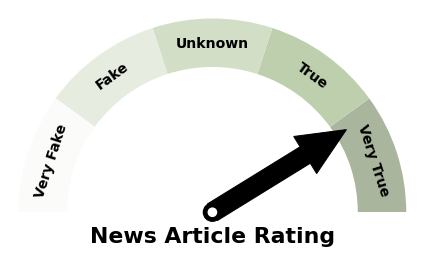

In [51]:
rotation = score * 180 
CM.gauge(labels=['Very Fake','Fake','Unknown','True','Very True'], \
      colors=['#f8faf7','#cfddc2','#a6bf8e','#7da15b','#556d3d'], ang_ = rotation, title='News Article Rating')

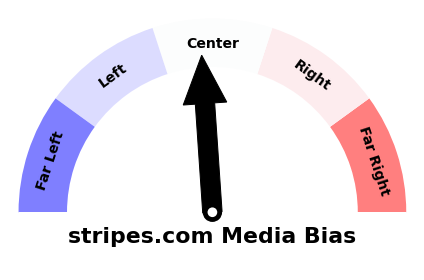

In [52]:
if Media_values_present:
    rotation = 90 - (m_bias_rating/100)*90 
    CM.gauge(labels=['Far Left','Left','Center','Right','Far Right'], \
          colors=['#0000FF','#BBBBFF','#FAFCFC','#FCDADE','#FF0000'], ang_ = rotation , title=f'{news_source} Media Bias') 
else:
    print(f'No media reliability or bias data for {news_source}.')

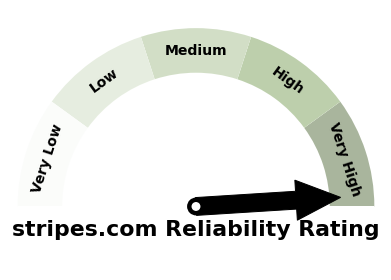

In [53]:
if Media_values_present:
    rotation = m_bias_score * 180 
    CM.gauge(labels=['Very Low','Low','Medium','High','Very High'], \
          colors=['#f8faf7','#cfddc2','#a6bf8e','#7da15b','#556d3d'], ang_ = rotation , title= f'{news_source} Reliability Rating') 
else:
    print(f'No media reliability or bias data for {news_source}.')

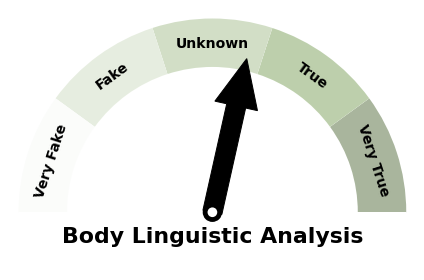

In [54]:
rotation = LIWC_body_prob[article_nbr][1] * 180
CM.gauge(labels=['Very Fake','Fake','Unknown','True','Very True'], \
      colors=['#f8faf7','#cfddc2','#a6bf8e','#7da15b','#556d3d'], ang_ = rotation, title=f'Body Linguistic Analysis')

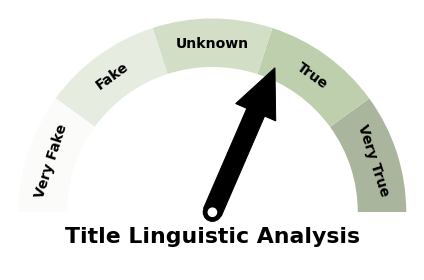

In [55]:
rotation = LIWC_title_prob[article_nbr][1] * 180
CM.gauge(labels=['Very Fake','Fake','Unknown','True','Very True'], \
      colors=['#f8faf7','#cfddc2','#a6bf8e','#7da15b','#556d3d'], ang_ = rotation, title=f'Title Linguistic Analysis')

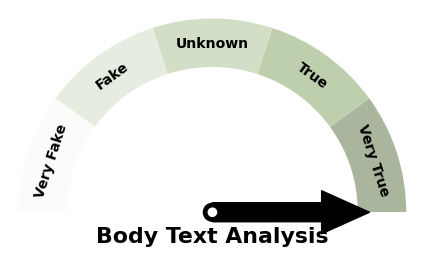

In [56]:
rotation = TFIDF_body_prob[article_nbr][1] * 180
CM.gauge(labels=['Very Fake','Fake','Unknown','True','Very True'], \
      colors=['#f8faf7','#cfddc2','#a6bf8e','#7da15b','#556d3d'], ang_ = rotation, title=f'Body Text Analysis')

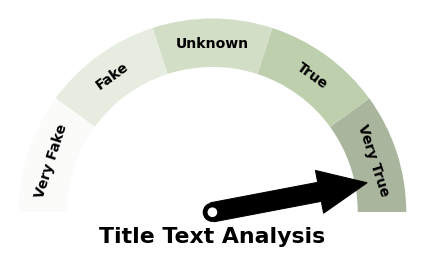

In [57]:
rotation = TFIDF_title_prob[article_nbr][1] * 180
CM.gauge(labels=['Very Fake','Fake','Unknown','True','Very True'], \
      colors=['#f8faf7','#cfddc2','#a6bf8e','#7da15b','#556d3d'], ang_ = rotation, title=f'Title Text Analysis')

In [58]:
print(f'List of top linguistic features in the body that indicate the article is {news.lower()} news.')
print('-----------------------------------------------------------------------------------')
for word in LIWC_body_support_str:
    print(word)

List of top linguistic features in the body that indicate the article is true news.
-----------------------------------------------------------------------------------
The low use of "Colons" indicates True news.
The low use of "Words/sentence" indicates True news.
The high use of "Analytical thinking" indicates True news.
The high use of "Hear" indicates True news.
The low use of "Common Adverbs" indicates True news.
The low use of "Question marks" indicates True news.
The low use of "See" indicates True news.
The low use of "Exclamation marks" indicates True news.
The high use of "Words > 6 letters" indicates True news.
The low use of "2nd person" indicates True news.
The high use of "Work" indicates True news.
The low use of "All Punctuation" indicates True news.


In [59]:
print(f'List of top linguistic features in the body that indicate the article is {counter_news.lower()} news.')
print('-----------------------------------------------------------------------------------')
for word in LIWC_body_counter_str:
    print(word)

List of top linguistic features in the body that indicate the article is fake news.
-----------------------------------------------------------------------------------
The high use of "Total pronouns" indicates Fake news.
The high use of "Other punctuation" indicates Fake news.
The high use of "Total function words" indicates Fake news.
The high use of "Personal pronouns" indicates Fake news.
The low use of "Past focus" indicates Fake news.
The high use of "Present focus" indicates Fake news.
The high use of "Informal language" indicates Fake news.
The high use of "Impersonal pronouns" indicates Fake news.
The high use of "Certainty" indicates Fake news.
The low use of "Periods" indicates Fake news.
The low use of "Power" indicates Fake news.
The high use of "Netspeak" indicates Fake news.
The low use of "Perceptual processes" indicates Fake news.


In [60]:
print(f'List of top linguistic features in the title that indicate the article is {news.lower()} news.')
print('-----------------------------------------------------------------------------------')
for word in LIWC_title_support_str:
    print(word)

List of top linguistic features in the title that indicate the article is true news.
-----------------------------------------------------------------------------------
The low use of "Colons" indicates True news.
The low use of "Words/sentence" indicates True news.
The low use of "Question marks" indicates True news.
The low use of "Total pronouns" indicates True news.
The low use of "Other punctuation" indicates True news.
The low use of "Total function words" indicates True news.
The low use of "See" indicates True news.
The low use of "Exclamation marks" indicates True news.
The high use of "Words > 6 letters" indicates True news.
The low use of "Informal language" indicates True news.
The low use of "Impersonal pronouns" indicates True news.
The low use of "Certainty" indicates True news.
The low use of "2nd person" indicates True news.
The low use of "Netspeak" indicates True news.
The low use of "All Punctuation" indicates True news.


In [61]:
print(f'List of top linguistic features in the title that indicate the article is {counter_news.lower()} news.')
print('-----------------------------------------------------------------------------------')
for word in LIWC_title_counter_str:
    print(word)

List of top linguistic features in the title that indicate the article is fake news.
-----------------------------------------------------------------------------------
The high use of "Analytical thinking" indicates Fake news.
The high use of "Hear" indicates Fake news.
The low use of "Common Adverbs" indicates Fake news.
The low use of "Personal pronouns" indicates Fake news.
The high use of "Past focus" indicates Fake news.
The low use of "Present focus" indicates Fake news.
The high use of "Work" indicates Fake news.
The high use of "Periods" indicates Fake news.
The high use of "Power" indicates Fake news.
The high use of "Perceptual processes" indicates Fake news.


In [62]:
# print(f'List of artcile body words that are present and more often found in {news.lower()} news articles.')
# print('-----------------------------------------------------------------------------------')
# if news == 'True':
#     for word in body_true_word_list[:10]:
#         print(word,end=', ')
# else:
#     for word in body_fake_word_list[:10]:
#         print(word,end=', ')

In [63]:
# print(f'List of artcile title  words that are present and more often found in {news.lower()} news titles.')
# print('-----------------------------------------------------------------------------------')
# if news == 'True':
#     for word in title_true_word_list:
#         print(word,end=', ')
# else:
#     for word in title_fake_word_list:
#         print(word,end=', ')

In [64]:
Notebook_end = time.time()
Total_Notebook_Time = round((Notebook_end - Notebook_start)/60.0,)
print(f'This notebook took {Total_Notebook_Time} min to run.')

This notebook took 5 min to run.
